# Problem Statement:
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount,Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.(Classification)

# The steps which are followed to solve this problem statement :
1.Data Cleaning 
2.Exploratory Data Analysis 
  -Visualization of Data.
  -checking corelation of features
  -skewness in data
  -data standardisation. 
3.feature selection 
4.model seection depending on problem 
5.evaluating the model using various metrics.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Importing training Data

In [2]:
df=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/training_set (1).csv')
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Looking for missing values

In [4]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Since Credit_History feature has only three types of values we will treat it as a categorical. 

In [5]:
df['Credit_History']=df['Credit_History'].fillna(1)

# Missing value treatment

Divide data according to their datatypes, categorical and numerical

In [6]:
cat=[]
con=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [7]:
con.remove('Credit_History')

In [8]:
for i in cat:
        c=df[i].mode()[0]
        df[i]=df[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=df[i].mean()
        df[i]=df[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Dropping Un-necessary features

In [10]:
df1=df.drop(['Loan_ID'],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

Here we are classifying the loan eligibility.In our data feature called 'Loan_Status' ,which have YES and NO values means customer is eligible or not.

we will do exploratory data analysis with respect to Loan_Status.

Bivariate analysis

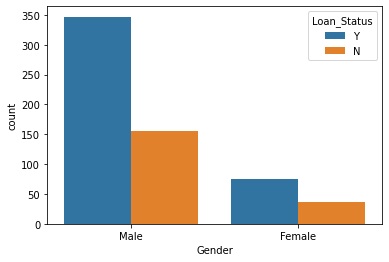

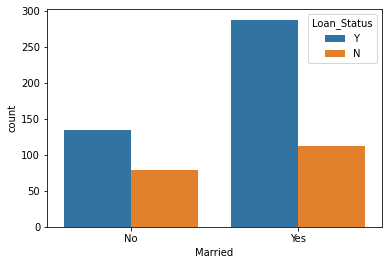

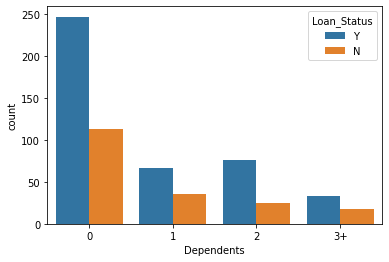

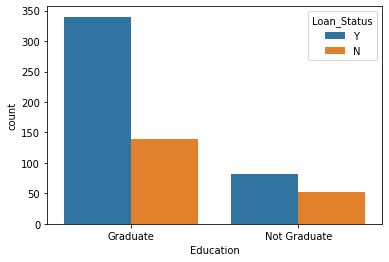

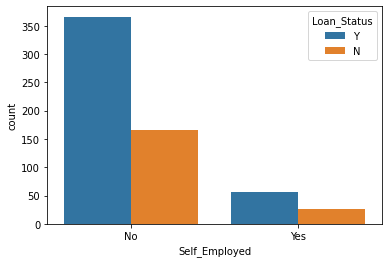

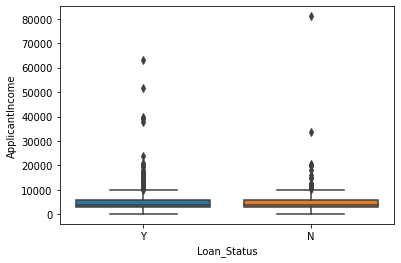

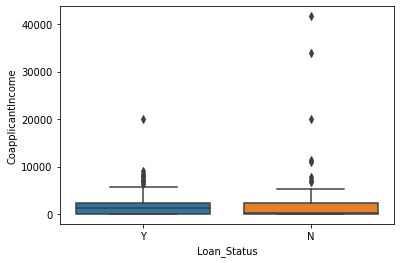

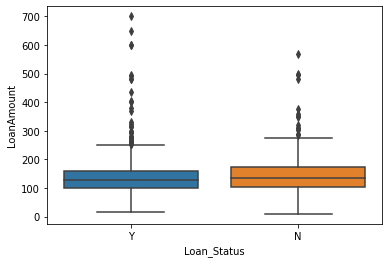

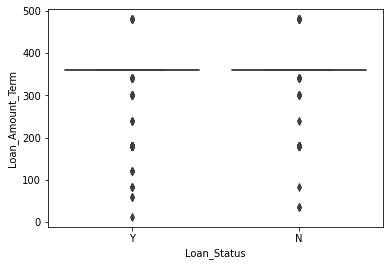

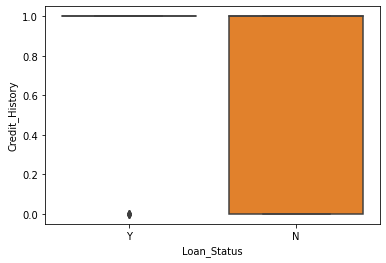

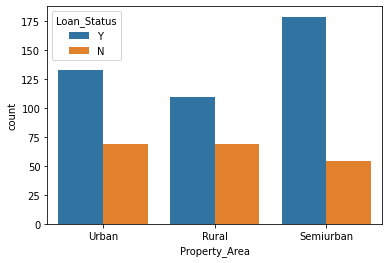

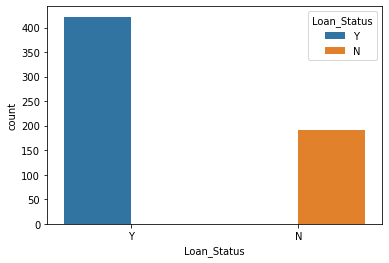

In [11]:
for i in df1.columns:
    if(df1[i].dtypes=='object'):
        sb.countplot(df1[i],hue=df1['Loan_Status'])
        plt.show()
    else:
        sb.boxplot(df1['Loan_Status'],df1[i])
        plt.show()

In our initial exploratory data analysis using graphs we can colclude following things:
    1.Gender--Most men are elligible for Loan than woman.
    2.Married--here married overtaking the unmarried.
    3.Dependants--with less dependatns possibility of getting loan is high.
    4.Education--Graduates are eligible than Non-graduate.
    5.Self-Employed---self employed are non-working class and bank has rejected them mostly.
    6.Loan_status doesn't show any varaition with ApplicantIncome and CoApplicantIncome.
    7.Loan_Amount_Term is given in months.
    8.Mostly customer with credit history 1 are ineligible.
    9.Property_Area--Semiurban property is accepted mostely for loan aproval.

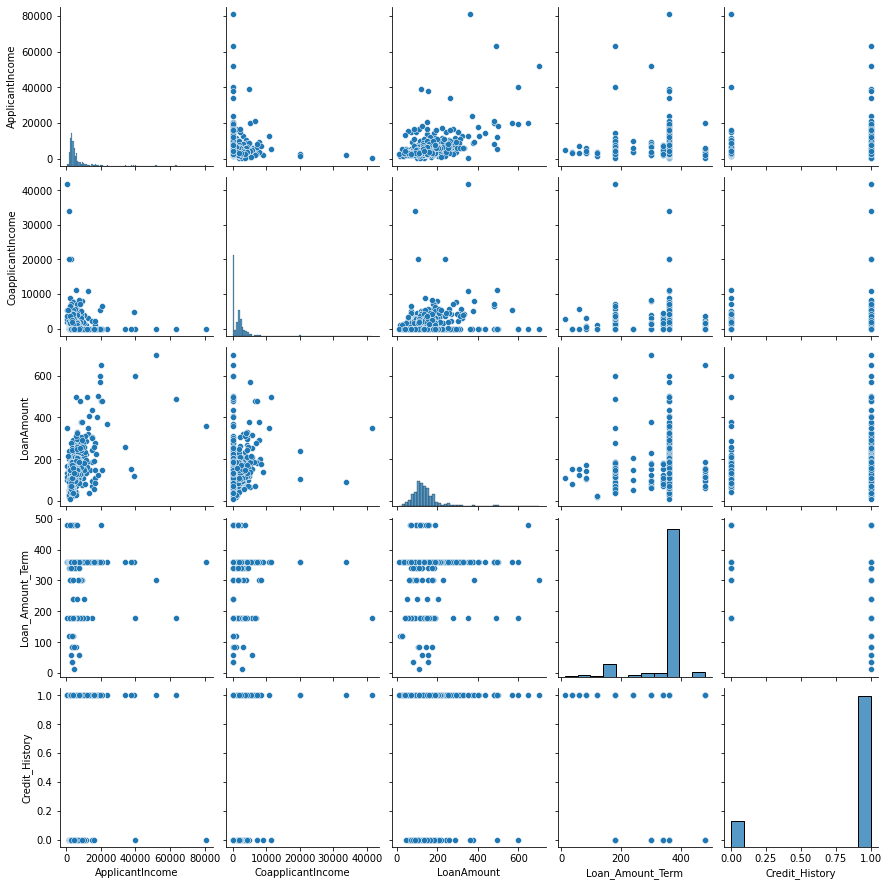

In [12]:
sb.pairplot(df1)

The data here is skewed and non linear

# Skewness in data

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

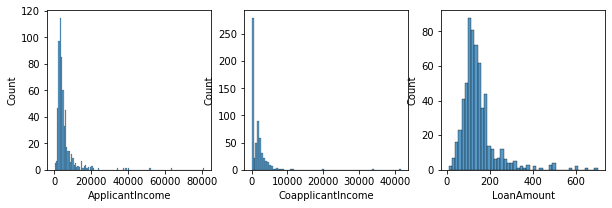

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sb.histplot(df1['ApplicantIncome'])
plt.subplot(3,3,2)
sb.histplot(df1['CoapplicantIncome'])
plt.subplot(3,3,3)
sb.histplot(df1['LoanAmount'])

It shows features are suffering from Negative skewness in data . Negative Skewness is where Mean < Median. skewness can be trated with log function.

In [14]:
(df1['CoapplicantIncome']==0).sum() 

273

In [15]:
z=np.log(df1['ApplicantIncome'])
y=np.log(df1['CoapplicantIncome'])
w=np.log(df1['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

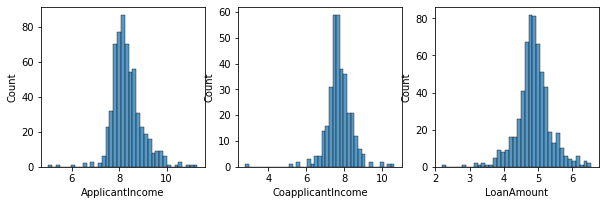

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sb.histplot(z)
plt.subplot(3,3,2)
sb.histplot(y)
plt.subplot(3,3,3)
sb.histplot(w)

In [17]:
df1['ApplicantIncome']=z
df1['LoanAmount']=w

# Standardisation of Data

For categorical features we will use OHE(One Hot Encoding

In [18]:
dep = []
for i in df1.Dependents:
    dep.append(int(i.replace("3+","3")))
df1.Dependents=dep

In [19]:
df1.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [20]:
cat.remove('Loan_ID')
cat.remove('Loan_Status')

In [21]:
dfcat=pd.get_dummies(df1[cat])
dfcat

,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,1,0,1,0,1,0,0,0,1
1,1,0,1,0,1,1,0,1,0,1,0,0
2,0,0,1,0,1,1,0,0,1,0,0,1
3,0,0,1,0,1,0,1,1,0,0,0,1
4,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,0,1,0,1,0,1,0,0
610,3,0,1,0,1,1,0,1,0,1,0,0
611,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0,1,0,1,1,0,1,0,0,0,1


For Numerical or continuos features we will use StandardScalar Standardisation

In [22]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
dfcon=pd.DataFrame(mm.fit_transform(df1[con]),columns=con)

In [23]:
dfcon

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.582270,0.000000,0.640628,0.743590
1,0.569738,0.036192,0.609760,0.743590
2,0.476150,0.000000,0.457624,0.743590
3,0.452363,0.056592,0.594936,0.743590
4,0.586321,0.000000,0.631977,0.743590
...,...,...,...,...
609,0.470762,0.000000,0.474397,0.743590
610,0.526032,0.000000,0.342605,0.358974
611,0.633470,0.005760,0.766255,0.743590
612,0.623537,0.000000,0.696827,0.743590


In [24]:
a=pd.DataFrame(df['Credit_History'],columns=['Credit_History'])
a

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
609,1.0
610,1.0
611,1.0
612,1.0


In [25]:
dfcon=pd.concat([dfcon,a],axis=1)
dfcon

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.582270,0.000000,0.640628,0.743590,1.0
1,0.569738,0.036192,0.609760,0.743590,1.0
2,0.476150,0.000000,0.457624,0.743590,1.0
3,0.452363,0.056592,0.594936,0.743590,1.0
4,0.586321,0.000000,0.631977,0.743590,1.0
...,...,...,...,...,...
609,0.470762,0.000000,0.474397,0.743590,1.0
610,0.526032,0.000000,0.342605,0.358974,1.0
611,0.633470,0.005760,0.766255,0.743590,1.0
612,0.623537,0.000000,0.696827,0.743590,1.0


joining cat and con dataframes

In [26]:
X=pd.concat([dfcon,dfcat],axis=1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.582270,0.000000,0.640628,0.743590,1.0,0,0,1,1,0,1,0,1,0,0,0,1
1,0.569738,0.036192,0.609760,0.743590,1.0,1,0,1,0,1,1,0,1,0,1,0,0
2,0.476150,0.000000,0.457624,0.743590,1.0,0,0,1,0,1,1,0,0,1,0,0,1
3,0.452363,0.056592,0.594936,0.743590,1.0,0,0,1,0,1,0,1,1,0,0,0,1
4,0.586321,0.000000,0.631977,0.743590,1.0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.470762,0.000000,0.474397,0.743590,1.0,0,1,0,1,0,1,0,1,0,1,0,0
610,0.526032,0.000000,0.342605,0.358974,1.0,3,0,1,0,1,1,0,1,0,1,0,0
611,0.633470,0.005760,0.766255,0.743590,1.0,1,0,1,0,1,1,0,1,0,0,0,1
612,0.623537,0.000000,0.696827,0.743590,1.0,2,0,1,0,1,1,0,1,0,0,0,1


Here we are classifying eligibility for loan ,so the target variable will be 'Loan_Status'.

In [27]:
Y=df1['Loan_Status']

In [28]:
def model_builder(mod):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score,confusion_matrix
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
    model = mod.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    tr_acc = accuracy_score(ytrain,pred_tr)
    ts_acc = accuracy_score(ytest,pred_ts)
    tr_acc1=round(tr_acc,3)
    ts_acc1=round(ts_acc,3)
    pred = model.predict(xtest)
    return tr_acc1,ts_acc1,confusion_matrix(ytest,pred)

In [29]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
model_builder(lo)

(0.8,
 0.854,
 array([[16, 18],
        [ 0, 89]], dtype=int64))

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=31)
model_builder(dtc)

(1.0,
 0.699,
 array([[20, 14],
        [23, 66]], dtype=int64))

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',random_state=31)
model_builder(dtc)

(1.0,
 0.699,
 array([[20, 14],
        [23, 66]], dtype=int64))

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=31,max_depth=2)
model_builder(rf)

(0.802,
 0.854,
 array([[16, 18],
        [ 0, 89]], dtype=int64))

# ML Model for test data

we are getting good results with LogisticRegression coz its binary classification . we will work on test data with Logistic.

In [33]:
dft=pd.read_csv('C:/Users/cmscomputers/Downloads/Skype/Loan_project/testing_set (1).csv')
dft

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [34]:
dft1=dft.drop(['Loan_ID'],axis=1)

In [35]:
dft1.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [36]:
dft1.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [37]:
dft1['Credit_History']=dft1['Credit_History'].fillna(1)

In [38]:
dft1.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [39]:
for i in cat:
        c=dft1[i].mode()[0]
        dft1[i]=dft1[i].fillna(c)  #-----> For catrgorical missisng values we will replace it with mode value of that feature       

        
for i in con:
        c=dft1[i].mean()
        dft1[i]=dft1[i].fillna(c)     #---->for numerical missing values we will replace it with mean value of that feature

In [40]:
dft1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [41]:
z=np.log(dft1['ApplicantIncome'])
w=np.log(dft1['LoanAmount'])

In [42]:
dft1['ApplicantIncome']=z
dft1['LoanAmount']=w

In [43]:
dft1.Dependents.value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [44]:
dep = []
for i in dft1.Dependents:
    dep.append(int(i.replace("3+","3")))
dft1.Dependents=dep

In [45]:
m=pd.get_dummies(dft1[cat])
m

,Dependents,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,1,1,0,1,0,0,0,1
1,1,0,1,0,1,1,0,1,0,0,0,1
2,2,0,1,0,1,1,0,1,0,0,0,1
3,2,0,1,0,1,1,0,1,0,0,0,1
4,0,0,1,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,3,0,1,0,1,0,1,0,1,0,0,1
363,0,0,1,0,1,1,0,1,0,0,0,1
364,0,0,1,1,0,1,0,1,0,0,1,0
365,0,0,1,0,1,1,0,1,0,1,0,0


In [46]:
print(dft1[con].to_string())

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0           8.651724                  0    4.700480        360.000000
1           8.031385               1500    4.836282        360.000000
2           8.517193               1800    5.337538        360.000000
3           7.757906               2546    4.605170        360.000000
4           8.094378                  0    4.356709        360.000000
5           7.680176               3422    5.023881        360.000000
6           7.707962                  0    4.077537        360.000000
7           8.263848                  0    4.990433        360.000000
8           9.520249                  0    5.634790        240.000000
9           7.783224               2400    4.812184        360.000000
10          8.036250                  0    4.499810        360.000000
11          7.689371               1516    5.087596        360.000000
12          8.334712                  0    3.688879        180.000000
13          9.406976

In [47]:
dft1.ApplicantIncome.replace([np.inf, -np.inf], np.nan, inplace=True)

In [48]:
dft1.ApplicantIncome.mean()

8.293886639938634

In [49]:
dft1.ApplicantIncome.isna().sum()

2

In [50]:
c=dft1['ApplicantIncome'].mean()
dft1['ApplicantIncome']=dft1['ApplicantIncome'].fillna(c)

In [51]:
n=pd.DataFrame(mm.fit_transform(dft1[con]),columns=[con])
n

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.475864,0.000000,0.459506,0.746835
1,0.347856,0.062500,0.505111,0.746835
2,0.448104,0.075000,0.673447,0.746835
3,0.291424,0.106083,0.427498,0.746835
4,0.360855,0.000000,0.344057,0.746835
...,...,...,...,...
362,0.402521,0.074042,0.468542,0.746835
363,0.410052,0.029542,0.474434,0.746835
364,0.359211,0.083042,0.505111,0.746835
365,0.448104,0.099708,0.581114,0.746835


In [52]:
b=pd.DataFrame(dft1['Credit_History'])
n=pd.concat([n,b],axis=1)
n

,"(ApplicantIncome,)","(CoapplicantIncome,)","(LoanAmount,)","(Loan_Amount_Term,)",Credit_History
0,0.475864,0.000000,0.459506,0.746835,1.0
1,0.347856,0.062500,0.505111,0.746835,1.0
2,0.448104,0.075000,0.673447,0.746835,1.0
3,0.291424,0.106083,0.427498,0.746835,1.0
4,0.360855,0.000000,0.344057,0.746835,1.0
...,...,...,...,...,...
362,0.402521,0.074042,0.468542,0.746835,1.0
363,0.410052,0.029542,0.474434,0.746835,1.0
364,0.359211,0.083042,0.505111,0.746835,1.0
365,0.448104,0.099708,0.581114,0.746835,1.0


In [53]:
x=pd.concat([n,m],axis=1)
Xt=pd.DataFrame(x)

In [54]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (ApplicantIncome,)       367 non-null    float64
 1   (CoapplicantIncome,)     367 non-null    float64
 2   (LoanAmount,)            367 non-null    float64
 3   (Loan_Amount_Term,)      367 non-null    float64
 4   Credit_History           367 non-null    float64
 5   Dependents               367 non-null    int64  
 6   Gender_Female            367 non-null    uint8  
 7   Gender_Male              367 non-null    uint8  
 8   Married_No               367 non-null    uint8  
 9   Married_Yes              367 non-null    uint8  
 10  Education_Graduate       367 non-null    uint8  
 11  Education_Not Graduate   367 non-null    uint8  
 12  Self_Employed_No         367 non-null    uint8  
 13  Self_Employed_Yes        367 non-null    uint8  
 14  Property_Area_Rural      3

# Creating model for train data

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lomodel = lo.fit(xtrain,ytrain)

# Getting prediction on test data

In [65]:
X.shape

(614, 17)

In [66]:
Xt.shape

(367, 17)

In [67]:
test_pred=pd.DataFrame(lomodel.predict(Xt),columns=['Loan_Status'])

In [68]:
test_results=pd.concat([dft1,test_pred],axis=1)

In [70]:
test_results

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,8.651724,0,4.700480,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.031385,1500,4.836282,360.0,1.0,Urban,Y
2,Male,Yes,2,Graduate,No,8.517193,1800,5.337538,360.0,1.0,Urban,Y
3,Male,Yes,2,Graduate,No,7.757906,2546,4.605170,360.0,1.0,Urban,Y
4,Male,No,0,Not Graduate,No,8.094378,0,4.356709,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3,Not Graduate,Yes,8.296297,1777,4.727388,360.0,1.0,Urban,Y
363,Male,Yes,0,Graduate,No,8.332789,709,4.744932,360.0,1.0,Urban,Y
364,Male,No,0,Graduate,No,8.086410,1993,4.836282,360.0,1.0,Semiurban,Y
365,Male,Yes,0,Graduate,No,8.517193,2393,5.062595,360.0,1.0,Rural,Y
